In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
!pip install tensorflow==2.0.0-beta1

import tensorflow as tf
import numpy as np

# Plotting library.
from matplotlib import pyplot as plt
import pylab as pl
from IPython import display

import warnings
warnings.filterwarnings('ignore')

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print ('Size of training images')
print (x_train.shape)
print ('Size of training labels')
print (y_train.shape)
print ('Size of test images')
print (x_test.shape)
print ('Size of test labels')
print (y_test.shape)

Size of training images
(60000, 28, 28, 1)
Size of training labels
(60000,)
Size of test images
(10000, 28, 28, 1)
Size of test labels
(10000,)


In [0]:
MAX_IMAGES = 10
def gallery(images, plot_labels=False, label=None, max_images=MAX_IMAGES, title='Input images'):  
  class_dict = [u'zero', u'one', u'two', u'three', u'four', u'five', u'six', u'seven', u'eight', u'nine']
  num_frames, h, w, num_channels = images.shape
  num_frames = min(num_frames, max_images)
  ff, axes = plt.subplots(1, num_frames,
                          figsize=(num_frames, 1),
                          subplot_kw={'xticks': [], 'yticks': []})
  for i in range(0, num_frames):
    if num_channels == 3:
      axes[i].imshow(np.squeeze(images[i]))
    else:
      axes[i].imshow(np.squeeze(images[i]), cmap='gray')
    if plot_labels:
      if label.any():
        axes[i].set_title(class_dict[label[i]])
    plt.setp(axes[i].get_xticklabels(), visible=False)
    plt.setp(axes[i].get_yticklabels(), visible=False)
  ff.subplots_adjust(wspace=0.1)
  plt.show()

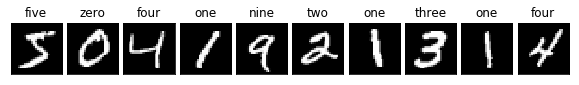

In [4]:
gallery(x_train, label=y_train, plot_labels=True)

In [0]:
NUM_CONV_FILTERS1 = 32  #@param
CONV_KERNEL_SIZE1 = 11  #@param
NUM_CONV_FILTERS2 = 64  #@param
CONV_KERNEL_SIZE2 = 3  #@param
NUM_DENSE_UNITS = 128  #@param
NUM_CLASSES = 10  #@param
EPOCHS = 5  #@param
BATCH_SIZE = 16 #@param

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(100000).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [0]:
mymodel = tf.keras.Sequential([
  tf.keras.layers.Conv2D(NUM_CONV_FILTERS1, CONV_KERNEL_SIZE1),
  tf.keras.layers.ReLU(),
  tf.keras.layers.Conv2D(NUM_CONV_FILTERS2, CONV_KERNEL_SIZE2),
  tf.keras.layers.ReLU(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(NUM_DENSE_UNITS),
  tf.keras.layers.ReLU(),
  tf.keras.layers.Dense(NUM_CLASSES),
  tf.keras.layers.Softmax()
])

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
# @tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = mymodel(images)
    loss = loss_fn(labels, predictions)
  gradients = tape.gradient(loss, mymodel.trainable_variables)
  optimizer.apply_gradients(zip(gradients, mymodel.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
# @tf.function
def test_step(images, labels):
  predictions = mymodel(images)
  t_loss = loss_fn(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [0]:
def display_filters_layer0(model):
  weights0 = model.layers[0].weights[0].numpy()
  filters = np.transpose(weights0, axes=(3, 0, 1, 2))
  gallery(filters, max_images=NUM_CONV_FILTERS1)

In [0]:
# visualise model weights (first layer only) and evaluate model on M batches
def eval_model(model, M=1):
  test_iter = 0
  for test_images, test_labels in test_ds:
    test_iter += 1
    if test_iter > M: 
      break
    predictions = model(test_images)
    idx_class = tf.argmax(predictions, axis=-1).numpy()
    gallery(test_images, label=idx_class, plot_labels=True)
    display_filters_layer0(model)

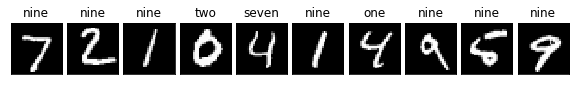

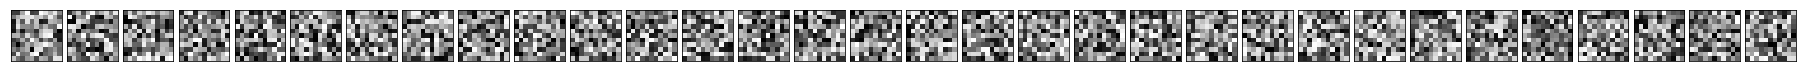

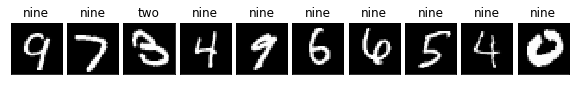

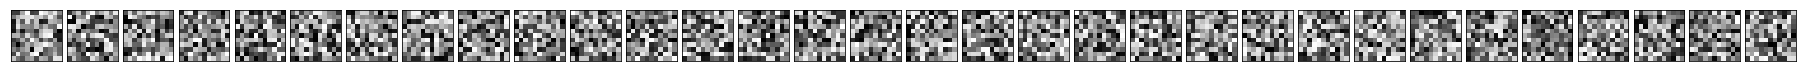

In [13]:
# visualise filters and labels before training
eval_model(mymodel, M=2)

In [0]:
# check number of parameters and configurations of layers to make sure the setup is correct
mymodel.summary()

W0803 22:19:02.974664 140447491729280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1220: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 0, train iter 10


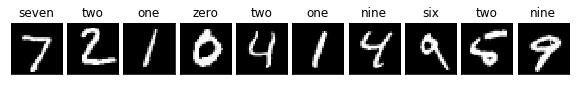

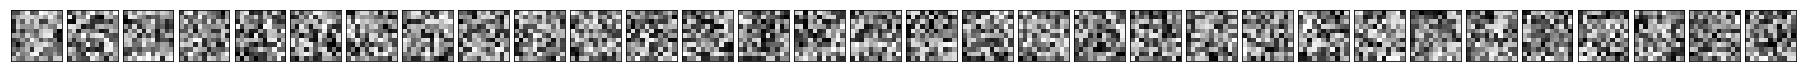

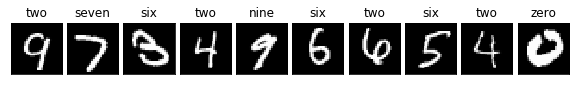

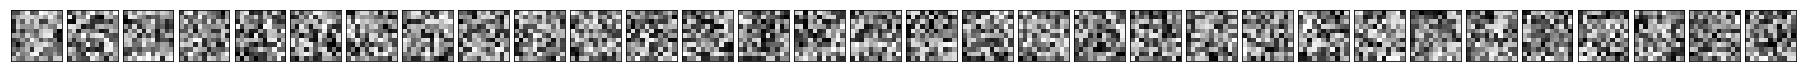

Epoch 0, train iter 20


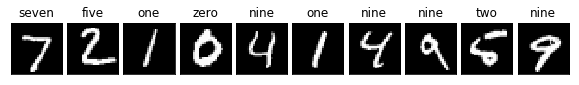

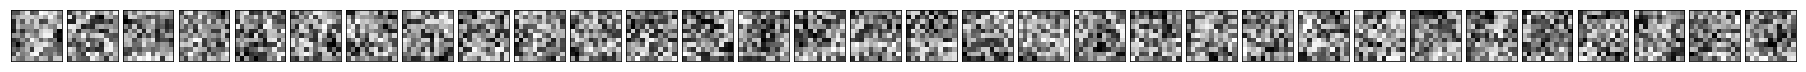

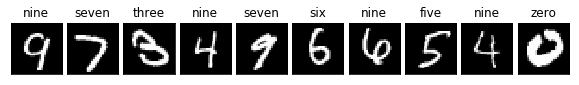

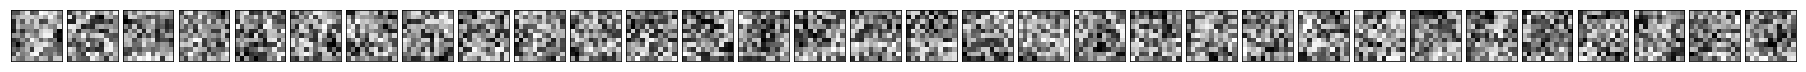

Epoch 0, train iter 30


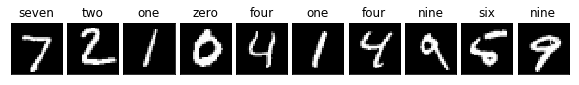

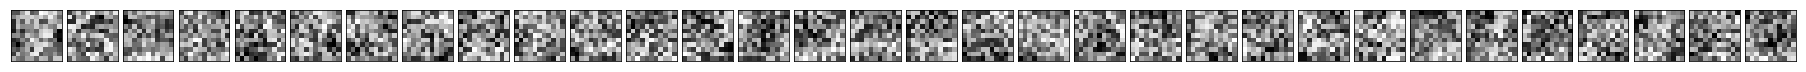

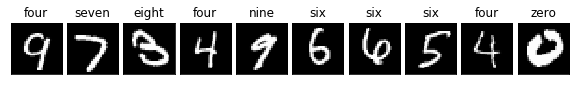

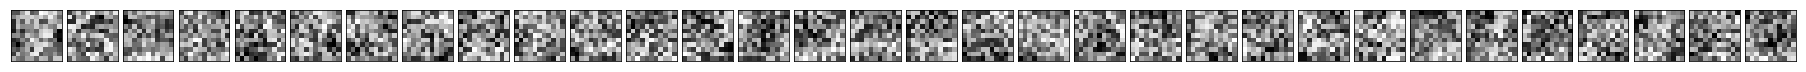

Epoch 0, train iter 40


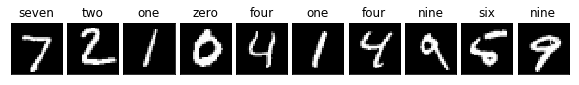

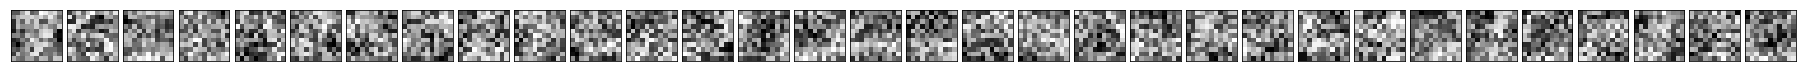

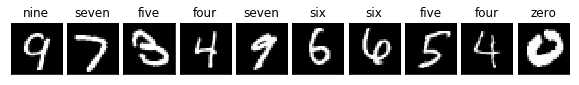

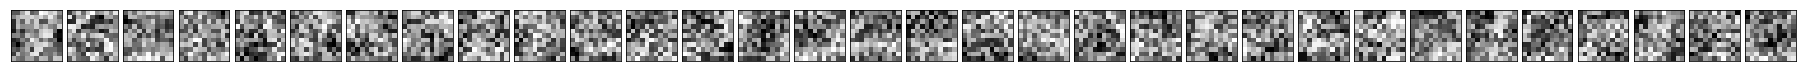

Epoch 0, train iter 50


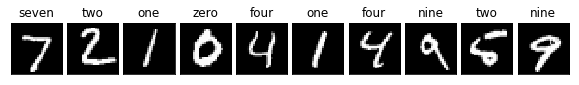

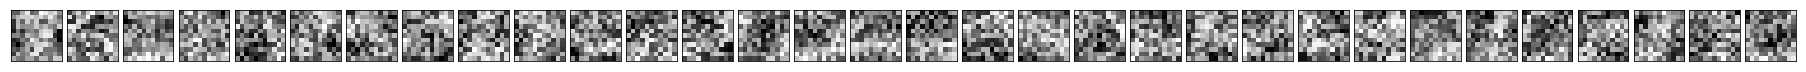

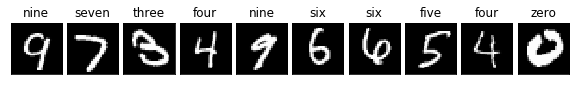

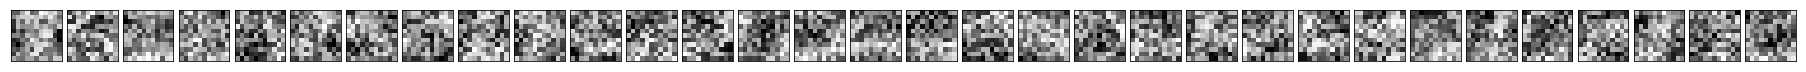

Epoch 0, train iter 60


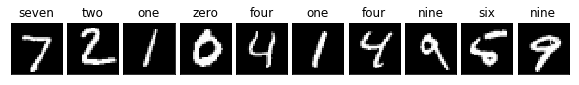

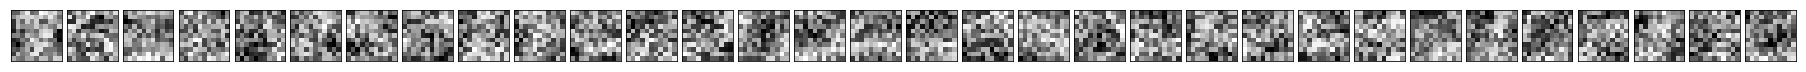

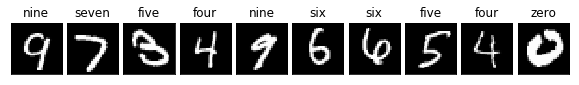

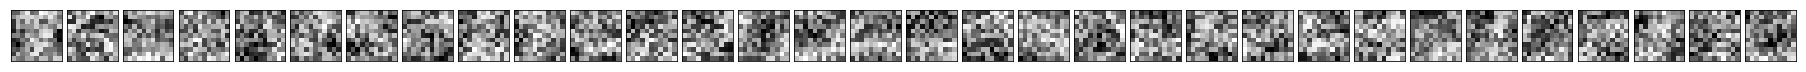

Epoch 0, train iter 70


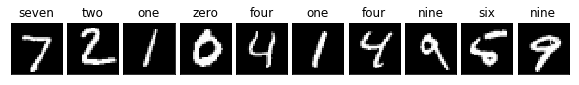

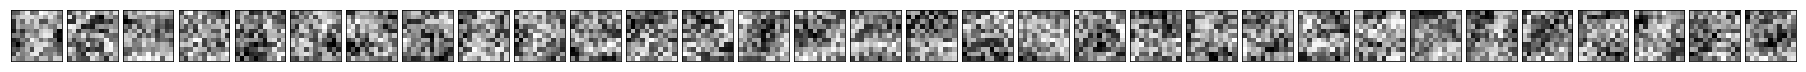

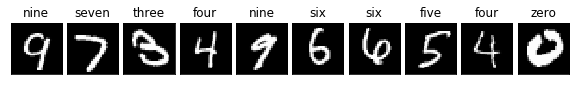

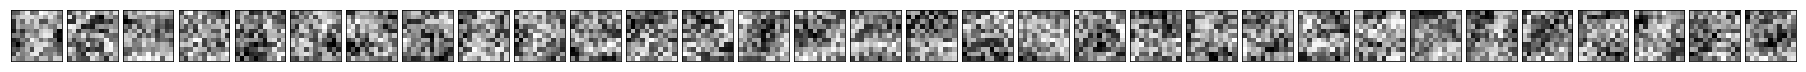

Epoch 0, train iter 80


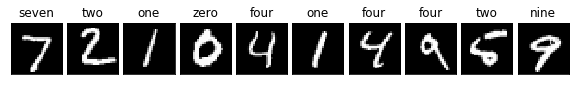

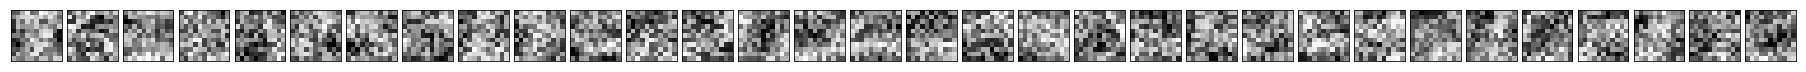

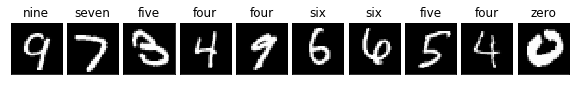

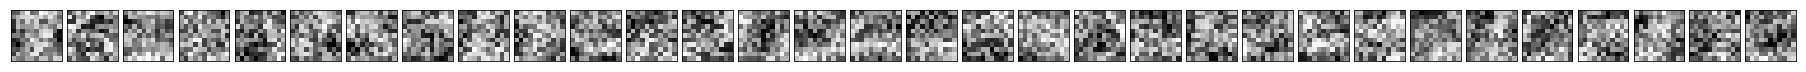

Epoch 0, train iter 90


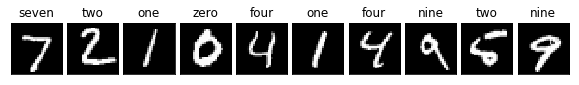

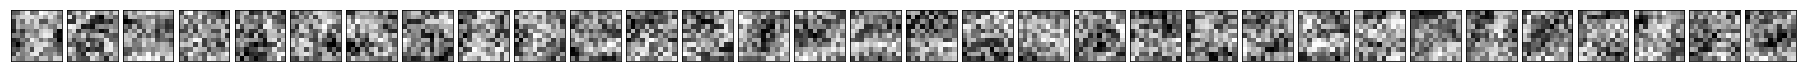

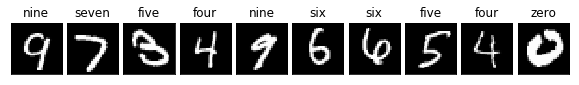

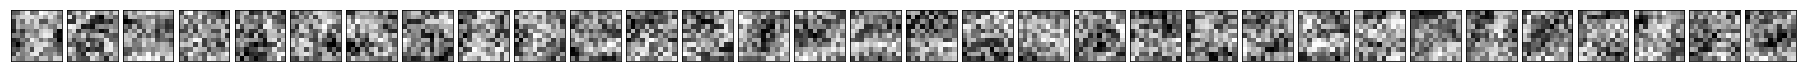

Epoch 0, train iter 100


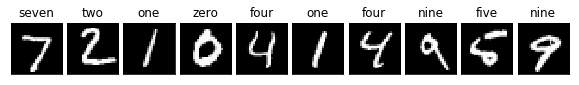

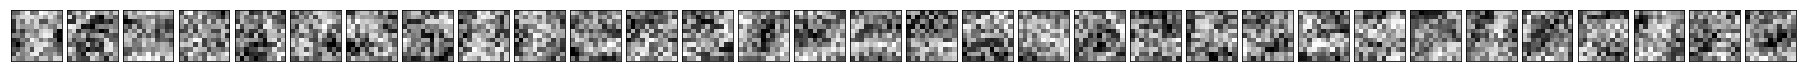

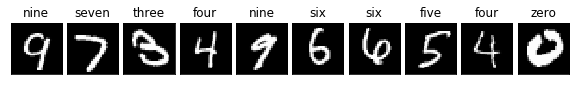

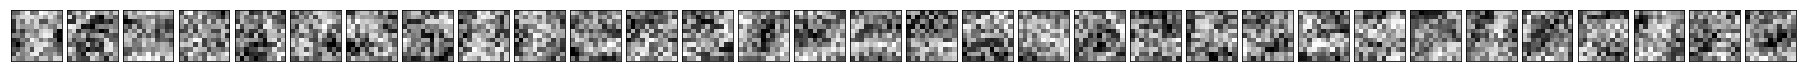

Epoch 0, train iter 110


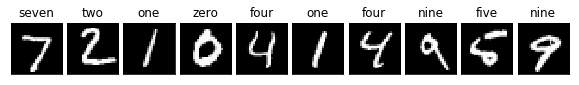

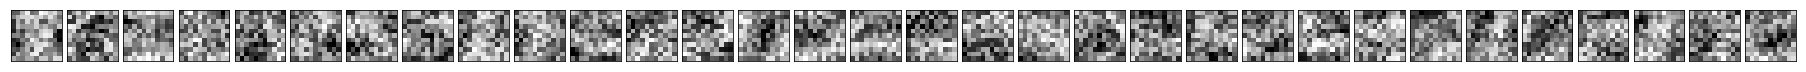

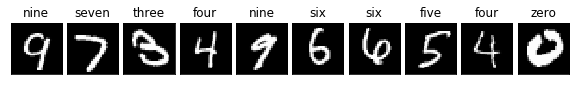

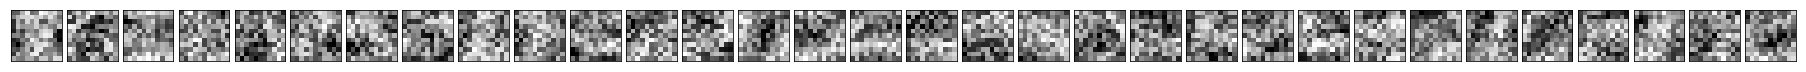

Epoch 0, train iter 120


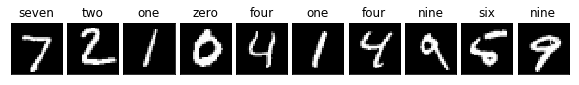

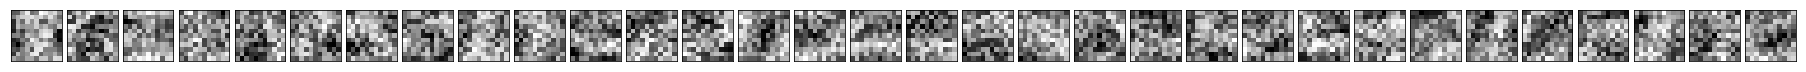

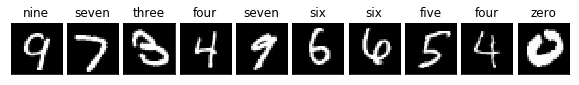

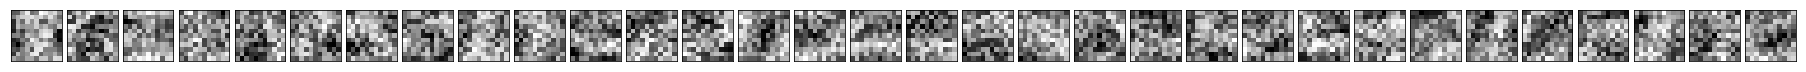

Epoch 0, train iter 130


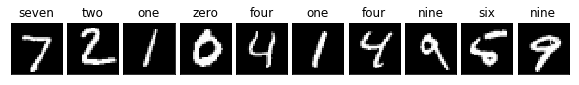

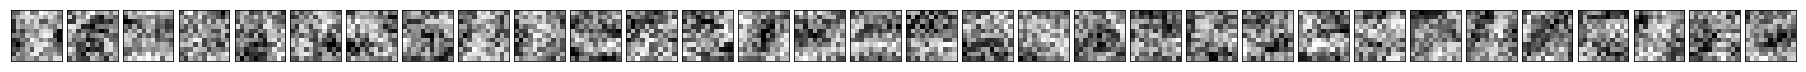

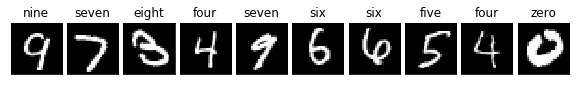

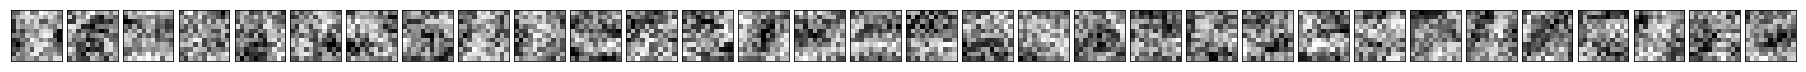

Epoch 0, train iter 140


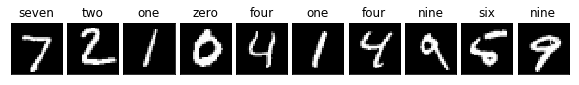

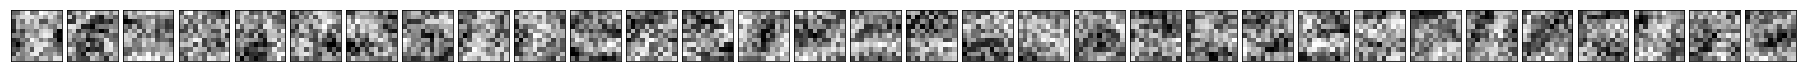

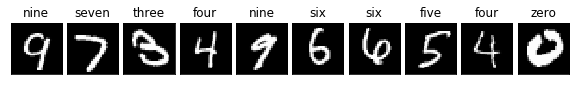

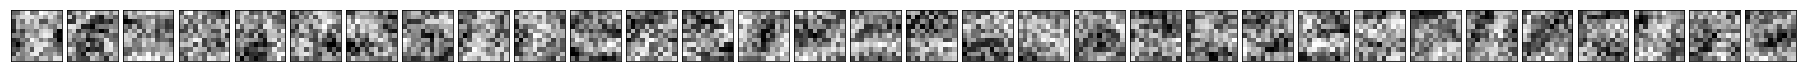

Epoch 0, train iter 150


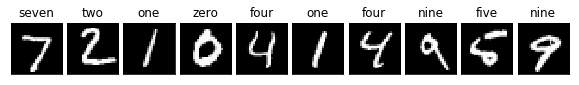

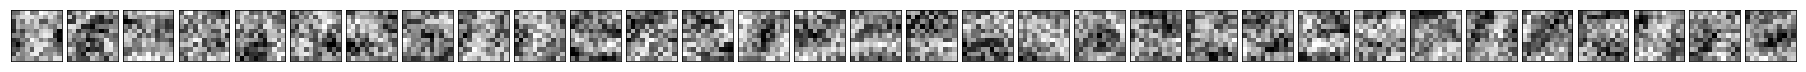

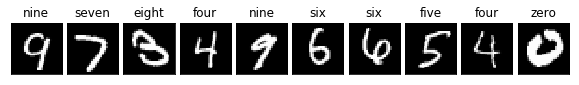

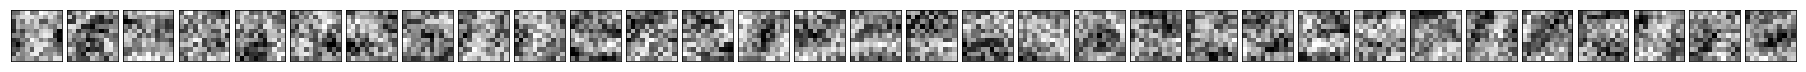

Epoch 0, train iter 160


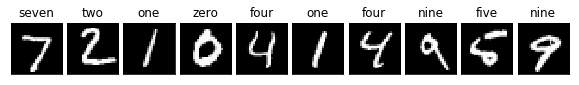

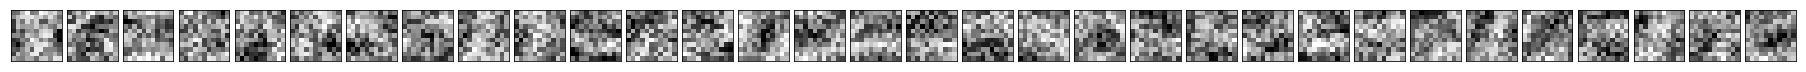

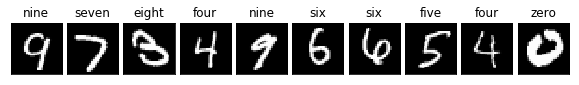

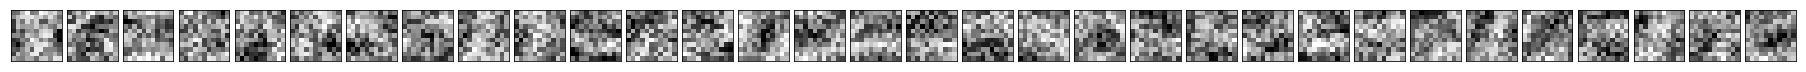

Epoch 0, train iter 170


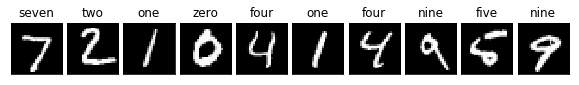

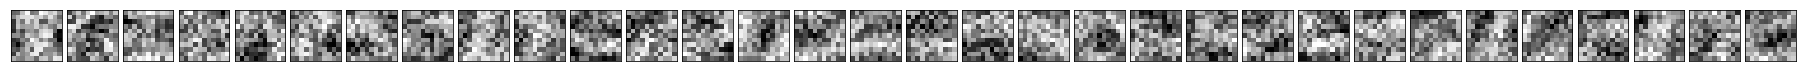

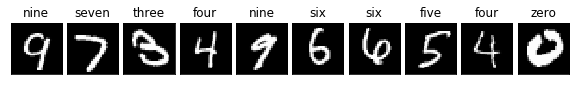

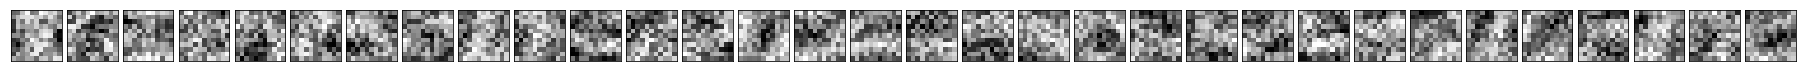

Epoch 0, train iter 180


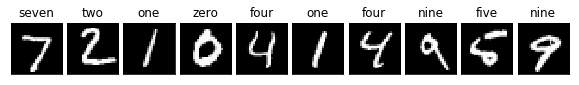

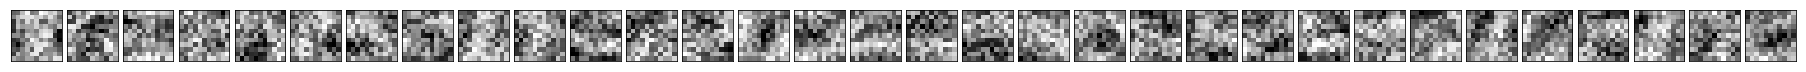

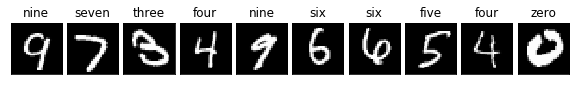

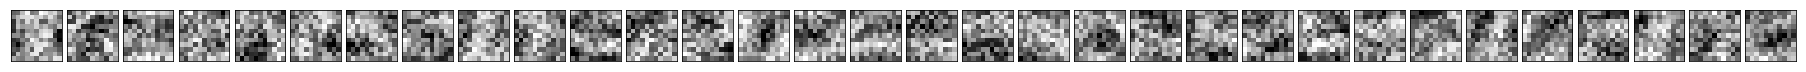

Epoch 0, train iter 190


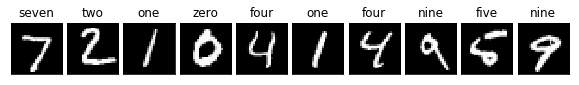

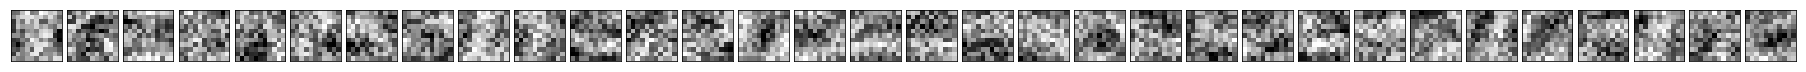

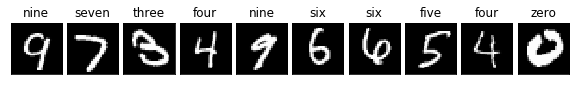

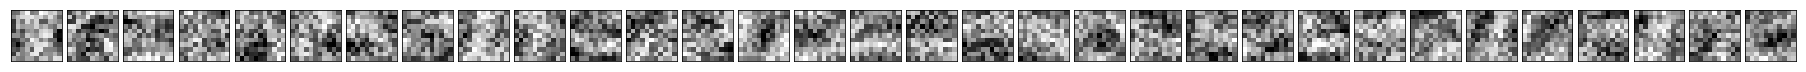

Epoch 0, train iter 200


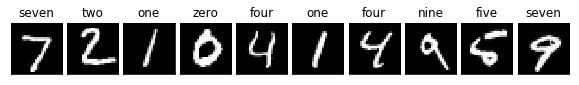

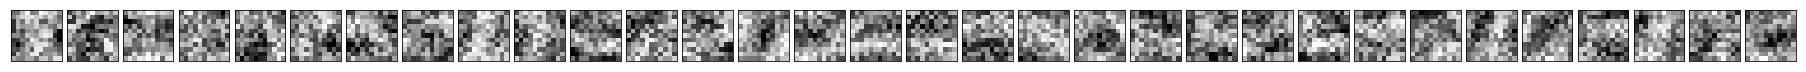

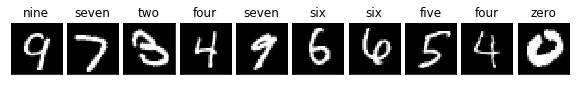

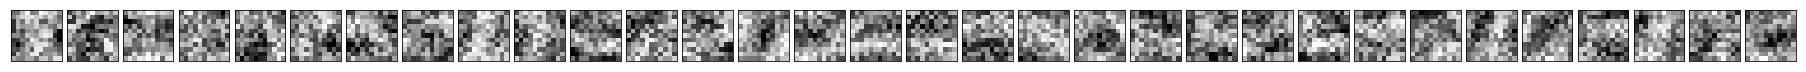

Epoch 0, train iter 210


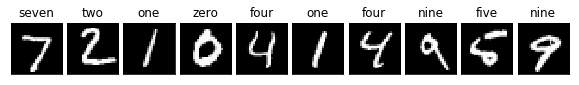

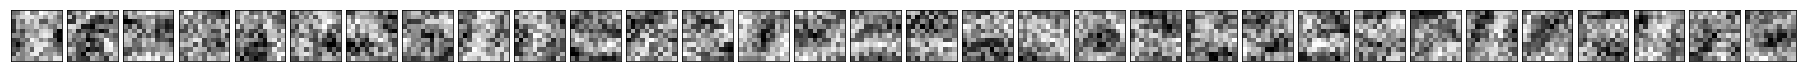

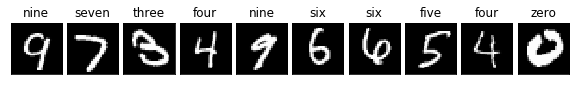

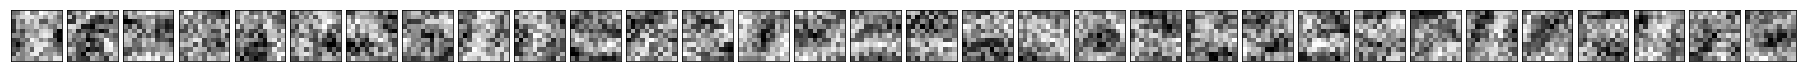

Epoch 0, train iter 220


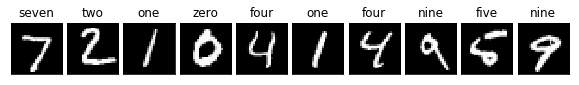

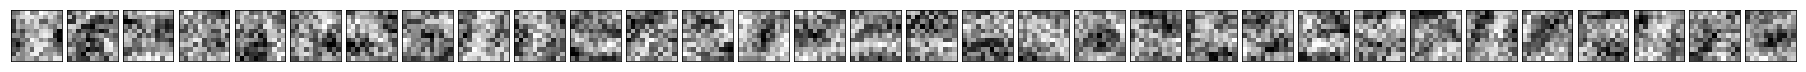

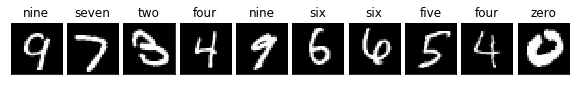

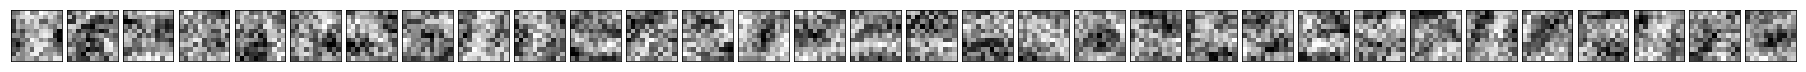

Epoch 0, train iter 230


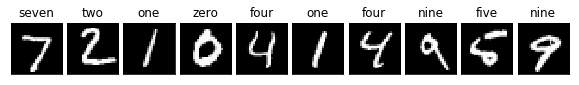

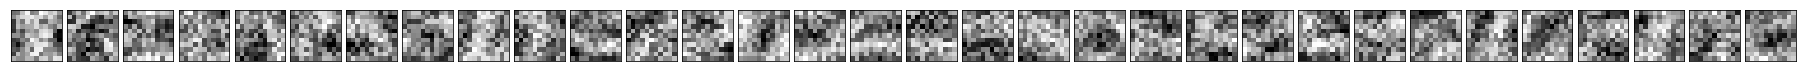

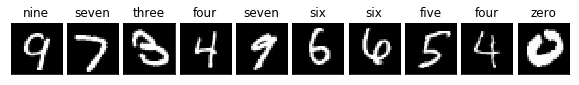

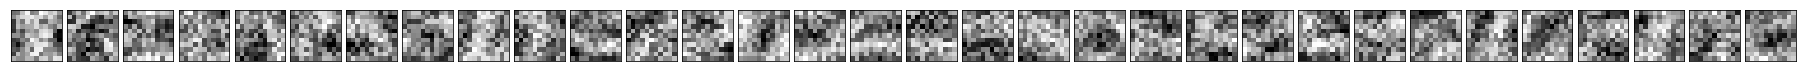

Epoch 0, train iter 240


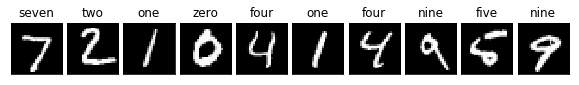

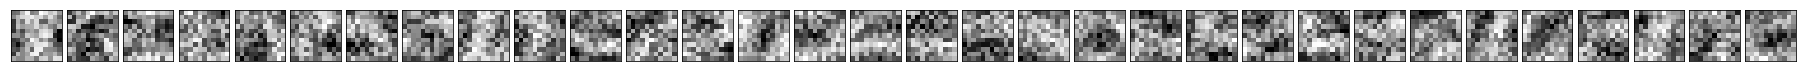

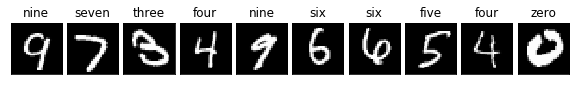

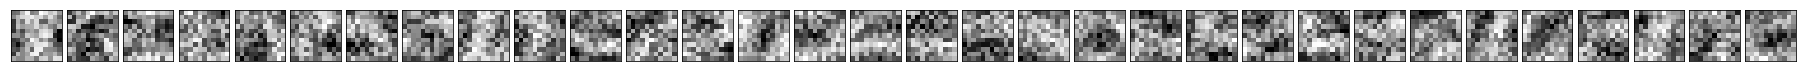

Epoch 0, train iter 250


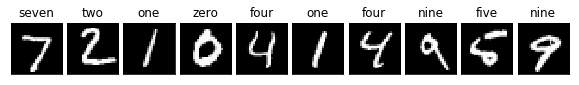

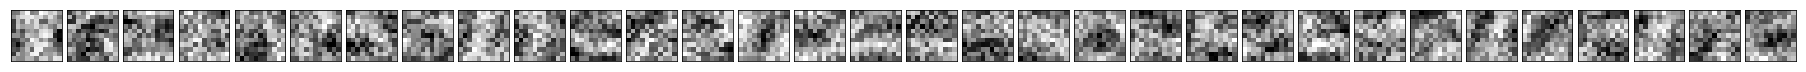

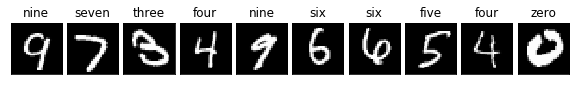

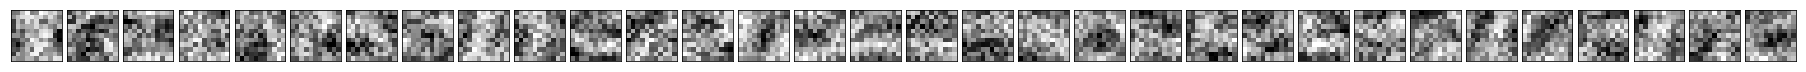

Epoch 0, train iter 260


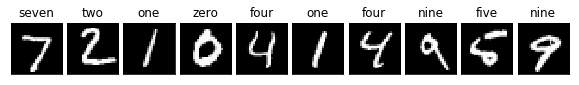

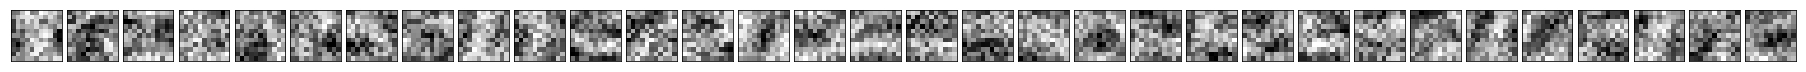

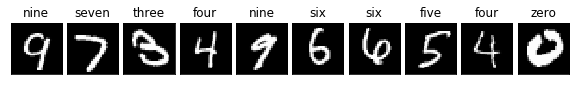

KeyboardInterrupt: ignored

In [15]:
for epoch in range(EPOCHS):
  train_iter = 0
  for images, labels in train_ds:
    train_iter += 1
    train_step(images, labels)
    if train_iter % 10 == 0:
      print ('Epoch {}, train iter {}'.format(epoch, train_iter))
      eval_model(mymodel, M=2)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  # visualise filters and labels after some training
  eval_model(mymodel, M=2)
  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))